In [1]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt
import cv2
import tensorflow as tf
from PIL import Image
import os
from sklearn.model_selection import train_test_split
from tensorflow.keras.utils import to_categorical
from keras.models import Sequential, load_model
from keras.layers import Conv2D, MaxPool2D, Dense, Flatten, Dropout

In [2]:
data = []
labels = []
classes = 43
cur_path = './data'

#Retrieving the images and their labels 
for i in range(classes):
    path = os.path.join(cur_path,'Train',str(i))
    images = os.listdir(path)

    for a in images:
        try:
            image = Image.open(path + '/'+ a)
            image = image.resize((30,30))
            image = np.array(image)
            #sim = Image.fromarray(image)
            data.append(image)
            labels.append(i)
        except:
            print("Error loading image")

#Converting lists into numpy arrays
data = np.array(data)
labels = np.array(labels)

In [3]:
print(data.shape, labels.shape)
#Splitting training and testing dataset
X_train, X_test, y_train, y_test = train_test_split(data, labels, test_size=0.2, random_state=100)

print(X_train.shape, X_test.shape, y_train.shape, y_test.shape)
X_train = X_train /255
X_test = X_test /255
#Converting the labels into one hot encoding
y_train = to_categorical(y_train, 43)
y_test = to_categorical(y_test, 43)

(39209, 30, 30, 3) (39209,)
(31367, 30, 30, 3) (7842, 30, 30, 3) (31367,) (7842,)


In [4]:
#Building the model
model = Sequential()
model.add(Conv2D(filters=32, kernel_size=(3 , 3), activation='relu', input_shape=X_train.shape[1:]))
model.add(MaxPool2D(pool_size=(2, 2)))
model.add(Conv2D(filters=64, kernel_size=(3, 3), activation='relu'))
model.add(MaxPool2D(pool_size=(2, 2)))
model.add(Dropout(rate=0.1))
model.add(Flatten()) 
model.add(Dense(256, activation='relu')) #hidden layer
model.add(Dense(43, activation='softmax')) #output layer

#Compilation of the model   
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

In [5]:
epochs = 10
history = model.fit(X_train, y_train, batch_size=32, epochs=epochs, validation_data=(X_test, y_test))
model.save("saved_model")

Epoch 1/10
981/981 [==============================] - 36s 36ms/step - loss: 0.8871 - accuracy: 0.7576 - val_loss: 0.2282 - val_accuracy: 0.9333
Epoch 2/10
981/981 [==============================] - 36s 37ms/step - loss: 0.1532 - accuracy: 0.9597 - val_loss: 0.1297 - val_accuracy: 0.9626
Epoch 3/10
981/981 [==============================] - 34s 34ms/step - loss: 0.0776 - accuracy: 0.9796 - val_loss: 0.0957 - val_accuracy: 0.9716
Epoch 4/10
981/981 [==============================] - 34s 34ms/step - loss: 0.0496 - accuracy: 0.9865 - val_loss: 0.0838 - val_accuracy: 0.9777
Epoch 5/10
981/981 [==============================] - 34s 35ms/step - loss: 0.0398 - accuracy: 0.9887 - val_loss: 0.0788 - val_accuracy: 0.9790
Epoch 6/10
981/981 [==============================] - 32s 33ms/step - loss: 0.0266 - accuracy: 0.9926 - val_loss: 0.0764 - val_accuracy: 0.9800
Epoch 7/10
981/981 [==============================] - 36s 36ms/step - loss: 0.0258 - accuracy: 0.9931 - val_loss: 0.0405 - val_accuracy:

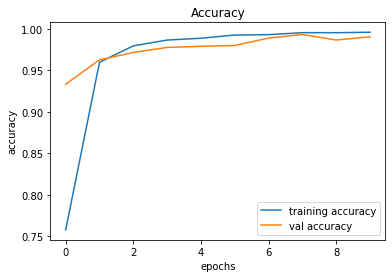

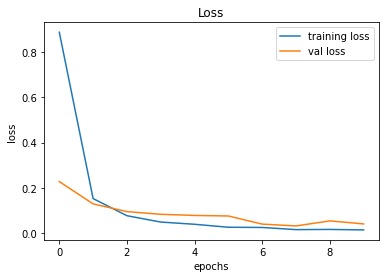

In [6]:
#plotting graphs for accuracy 
plt.figure(0)
plt.plot(history.history['accuracy'], label='training accuracy')
plt.plot(history.history['val_accuracy'], label='val accuracy')
plt.title('Accuracy')
plt.xlabel('epochs')
plt.ylabel('accuracy')
plt.legend()
plt.show()
 
plt.figure(1)
plt.plot(history.history['loss'], label='training loss')
plt.plot(history.history['val_loss'], label='val loss')
plt.title('Loss')
plt.xlabel('epochs')
plt.ylabel('loss')
plt.legend()
plt.show()


In [7]:
from sklearn.metrics import accuracy_score
from keras.models import load_model
model = load_model('saved_model')
y_test = pd.read_csv('./data/Test.csv')

labels = y_test["ClassId"].values
imgs = y_test["Path"].values
data=[]

for img in imgs:
    image = Image.open('./data/'+img)
    image = image.resize((30,30))
    data.append(np.array(image))

X_test=np.array(data)

pred = np.argmax(model.predict(X_test), axis=-1)


#Accuracy with the test data
from sklearn.metrics import accuracy_score
label_accuracy = accuracy_score(labels, pred)
print(accuracy_score(labels, pred))

0.9187648456057007


In [2]:
def getResults(result):
    classes ={ 1:'Speed limit (20km/h)',
            2:'Speed limit (30km/h)', 
            3:'Speed limit (50km/h)', 
            4:'Speed limit (60km/h)', 
            5:'Speed limit (70km/h)', 
            6:'Speed limit (80km/h)', 
            7:'End of speed limit (80km/h)', 
            8:'Speed limit (100km/h)', 
            9:'Speed limit (120km/h)', 
            10:'No passing', 
            11:'No passing veh over 3.5 tons', 
            12:'Right-of-way at intersection', 
            13:'Priority road', 
            14:'Yield', 
            15:'Stop', 
            16:'No vehicles', 
            17:'Veh > 3.5 tons prohibited', 
            18:'No entry', 
            19:'General caution', 
            20:'Dangerous curve left', 
            21:'Dangerous curve right', 
            22:'Double curve', 
            23:'Bumpy road', 
            24:'Slippery road', 
            25:'Road narrows on the right', 
            26:'Road work', 
            27:'Traffic signals', 
            28:'Pedestrians', 
            29:'Children crossing', 
            30:'Bicycles crossing', 
            31:'Beware of ice/snow',
            32:'Wild animals crossing', 
            33:'End speed + passing limits', 
            34:'Turn right ahead', 
            35:'Turn left ahead', 
            36:'Ahead only', 
            37:'Go straight or right', 
            38:'Go straight or left', 
            39:'Keep right', 
            40:'Keep left', 
            41:'Roundabout mandatory', 
            42:'End of no passing', 
            43:'End no passing veh > 3.5 tons' }
    try:
        return classes[int(result)+1]
    except:
        return 'Error'

    

In [23]:
import tkinter as tk
from tkinter import filedialog
from tkinter import *
from PIL import ImageTk, Image

import numpy
#load the trained model to classify sign
from keras.models import load_model
model = load_model('saved_model')

#dictionary to label all traffic signs class.
classes = { 1:'Tốc độ tối đa (20km/h)',
            2:'Tốc độ tối đa (30km/h)', 
            3:'Tốc độ tối đa (50km/h)', 
            4:'Tốc độ tối đa (60km/h)', 
            5:'Tốc độ tối đa (70km/h)', 
            6:'Tốc độ tối đa (80km/h)', 
            7:'Hết giới hạn tốc độ (80km/h)', 
            8:'Tốc độ tối đa (100km/h)', 
            9:'Tốc độ tối đa (120km/h)', 
            10:'Cấm vượt', 
            11:'Không vượt quá 3,5 tấn', 
            12:'Quyền ưu tiên tại giao lộ', 
            13:'Đường ưu tiên', 
            14:'Yield', 
            15:'Dừng', 
            16:'Cấm phương tiện', 
            17:'Cấm phương tiện >3.5 tấn', 
            18:'Cấm vào', 
            19:'Chướng ngại vật', 
            20:'Đường cong nguy hiểm bên trái', 
            21:'Đường cong nguy hiểm bên phải', 
            22:'Đường cong kép', 
            23:'Đường gập ghềnh', 
            24:'Đường trơn', 
            25:'Đường thu hẹp ở bên phải', 
            26:'Công trình đang thi công', 
            27:'Đèn tín hiệu', 
            28:'Đường đi bộ', 
            29:'Trẻ em băng qua', 
            30:'Xe đạp băng qua', 
            31:'Cẩn thận với băng, tuyết',
            32:'Động vật hoang dã băng qua', 
            33:'Kết thúc giớn hạn tốc độ', 
            34:'Rẽ phải phía trước', 
            35:'Rẽ trái phía trước', 
            36:'Chỉ được đi thẳng', 
            37:'Đi thẳng hoặc sang phải', 
            38:'Đi thẳng hoặc sang trái', 
            39:'Đi bên phải', 
            40:'Đi bên trái', 
            41:'Đi vòng xoay', 
            42:'Kết thúc cấm vượt', 
            43:'Kết thúc cấm vượt phương tiện > 3,5 tấn' }

#initialise GUI
top=tk.Tk()
top.geometry('800x600')
top.title('Phân loại biển báo giao thông')

top.configure(background='#FFFFE0')

#In ra kết quả dự đoán biển báo.
label=Label(top,background='#FFFFE0', font=('arial',15,'bold'))
sign_image = Label(top)

def classify(file_path):
    global label_packed
    image = Image.open(file_path)
    image = image.resize((30,30))
    image = numpy.expand_dims(image, axis=0)
    image = numpy.array(image)
    pred = numpy.argmax(model.predict(image), axis=-1)[0]
    # pred = model.predict_classes(image)[0]
    sign = classes[pred+1]
    print(sign)
    label.configure(foreground='#011638', text=sign) 

def show_classify_button(file_path):
    #Nút bấm phân loại biển báo
    classify_b=Button(top,text="Phân loại biển báo",command=lambda: classify(file_path),padx=10,pady=5)
    classify_b.configure(background='#FF0000', foreground='white',font=('arial',10,'bold'))
    classify_b.place(relx=0.79,rely=0.46)

#Hàm tải ảnh lên
def upload_image():
    try:
        file_path=filedialog.askopenfilename()
        uploaded=Image.open(file_path)
        uploaded.thumbnail(((top.winfo_width()/2.25),(top.winfo_height()/2.25)))
        im=ImageTk.PhotoImage(uploaded)

        sign_image.configure(image=im)
        sign_image.image=im
        label.configure(text='')
        show_classify_button(file_path)
    except:
        pass

#Nút tải ảnh lên
upload=Button(top,text="Tải ảnh lên",command=upload_image,padx=10,pady=5)
upload.configure(background='#FF0000', foreground='white',font=('arial',10,'bold'))

upload.pack(side=BOTTOM,pady=50)
sign_image.pack(side=BOTTOM,expand=True)
label.pack(side=BOTTOM,expand=True)
heading = Label(top, text="Biển Báo Giao Thông",pady=20, font=('arial',20,'bold'))
heading.configure(background='#FFFFE0',foreground='#FF0000')
heading.pack()
top.mainloop()

Dừng


In [3]:
import cv2
import numpy as np
from keras.models import load_model
model = load_model('saved_model')

In [4]:
print(model)

In [22]:
cap = cv2.VideoCapture(0)
from PIL import Image as im
import cv2 
while True:
    ret , frame =cap.read()
    frame = cv2.flip(frame , 1)
    roi  = frame[100:400 , 200:500]
    roi = cv2.flip(roi  ,1)
    cv2.imshow('roi', roi)
    roi = cv2.resize(roi , (30 , 30), interpolation = cv2.INTER_AREA)
    cv2.imshow('roi is printed' , roi )
    img = im.fromarray(roi)
    img.save('minhphuc.png')
    img = cv2.imread('minhphuc.png')
    img = img.reshape(1 , 30  , 30 , 3)
    img = img / 255
    image = frame.copy()
    cv2.rectangle(image , (200 , 100), (500 , 400) , (255 , 0 ,0 ) , 4)
    # Predict
    captured_image = model.predict(img , 1 ,verbose =0)   
    result = np.argmax(captured_image.round() , axis = 1) 
    cv2.putText(image, getResults(result), (20, 100) , cv2.FONT_HERSHEY_SIMPLEX  , 1 , (0 , 255 , 0) , 2)
    cv2.imshow("Picture", image)
    if cv2.waitKey(1) ==13:
        break
cap.release()
cv2.destroyAllWindows()